# BrainStation DataScience Course Project

## Jorge Garciadiego

The Objective of this project is to develop a ML based model for the prediction The likehood of a customer to suscribe to a new banking priduct <font color=salmon>(Term Deopsit)</font>

The dataset provided contains records of marketing campaings for similar products. Some clients had been contacted more than once in order to know if the product would be subscribed or not &#x27A9; this is `important`, since there would be more than one record for the same person.

DataSet name: `full.csv` <br>
location: `data/`

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
raw_data = pd.read_csv('data/full.csv')

In [4]:
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
raw_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### <font color=#adf7b6>Input Variables</font>

<font size= 3px color=#ffee93>&#x27AB;</font> Input Variables <font size= 3px color=#ffee93>&#x27AD;</font> Bank Client data <br>

<font color=#ffee93>&#x27AD;These columns describe the Client attributes</font><br>

<font size= 3px color=#ffee93>1 &#x27AD;</font> age <font color=#adf7b6>(numeric)</font><br>
<font size= 3px color=#ffee93>2 &#x27AD;</font> job : type of job (<font color=#adf7b6>categorical</font>`: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'`)<br>
<font size= 3px color=#ffee93>3 &#x27AD;</font> marital : marital status (<font color=#adf7b6>categorical</font>`: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed`)<br>
<font size= 3px color=#ffee93>4 &#x27AD;</font> education (<font color=#adf7b6>categorical</font>`: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'`)<br>
<font size= 3px color=#ffee93>5 &#x27AD;</font> default: has credit in default? (<font color=#adf7b6>categorical</font>`: 'no','yes','unknown'`)<br>
<font size= 3px color=#ffee93>6 &#x27AD;</font> housing: has housing loan? (<font color=#adf7b6>categorical</font>`: 'no','yes','unknown'`)<br>
<font size= 3px color=#ffee93>7 &#x27AD;</font> loan: has personal loan? (<font color=#adf7b6>categorical</font>`: 'no','yes','unknown'`)<br>

In [6]:
client_data = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

In [7]:
raw_data.loc[:, client_data].head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [8]:
raw_data.loc[:, client_data].describe(include=[object, np.number])

,age,job,marital,education,default,housing,loan
count,41188.00000,41188,41188,41188,41188,41188,41188
unique,NaN,12,4,8,3,3,3
top,NaN,admin.,married,university.degree,no,yes,no
freq,NaN,10422,24928,12168,32588,21576,33950
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN


### <font color=#adf7b6> Variables related with the last contact of the current campaign </font>

<font size= 3px color=#ffee93>8 &#x27AD;</font>- contact: contact communication type (<font color=#adf7b6>categorical</font>: `'cellular','telephone'`)<br>
<font size= 3px color=#ffee93>9 &#x27AD;</font>- month: last contact month of year (<font color=#adf7b6>categorical</font>: `'jan', 'feb', 'mar', ..., 'nov', 'dec'`)<br>
<font size= 3px color=#ffee93>10 &#x27AD;</font>- day_of_week: last contact day of the week (<font color=#adf7b6>categorical</font>: `'mon','tue','wed','thu','fri'`)<br>
<font size= 3px color=#ffee93>11 &#x27AD;</font>- duration: last contact duration, in seconds (<font color=#adf7b6>numeric</font>). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [9]:
last_contact = ['contact', 'month', 'day_of_week', 'duration']

In [10]:
raw_data.loc[:, last_contact].describe(include=[object, np.number])

,contact,month,day_of_week,duration
count,41188,41188,41188,41188.000000
unique,2,10,5,NaN
top,cellular,may,thu,NaN
freq,26144,13769,8623,NaN
mean,NaN,NaN,NaN,258.285010
std,NaN,NaN,NaN,259.279249
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,102.000000
50%,NaN,NaN,NaN,180.000000
75%,NaN,NaN,NaN,319.000000


### <font color=#adf7b6> Other Attributes </font>
<font size= 3px color=#ffee93>12 &#x27AD;</font> campaign: number of contacts performed during this campaign and for this client (<font color=#adf7b6> numeric, includes last contact </font>)<br>
<font size= 3px color=#ffee93>13 &#x27AD;</font> pdays: number of days that passed by after the client was last contacted from a previous campaign (<font color=#adf7b6> numeric; 999 means client was not previously contacted </font>)<br>
<font size= 3px color=#ffee93>14 &#x27AD;</font> previous: number of contacts performed before this campaign and for this client (<font color=#adf7b6> numeric </font>)<br>
<font size= 3px color=#ffee93>15 &#x27AD;</font> poutcome: outcome of the previous marketing campaign (<font color=#adf7b6>categorical</font>: 'failure','nonexistent','success')<br>

In [11]:
other_attributes = ['campaign', 'pdays', 'previous', 'poutcome']

In [12]:
raw_data.loc[:, other_attributes].describe(include=[object, np.number])

,campaign,pdays,previous,poutcome
count,41188.000000,41188.000000,41188.000000,41188
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,nonexistent
freq,NaN,NaN,NaN,35563
mean,2.567593,962.475454,0.172963,NaN
std,2.770014,186.910907,0.494901,NaN
min,1.000000,0.000000,0.000000,NaN
25%,1.000000,999.000000,0.000000,NaN
50%,2.000000,999.000000,0.000000,NaN
75%,3.000000,999.000000,0.000000,NaN


### <font color=#adf7b6> Social and Economic Attributes </font>

<font size= 3px color=#ffee93>16 &#x27AD;</font> <font color=#52b2cf>emp.var.rate</font>: employment variation rate - quarterly indicator (<font color=#adf7b6>numeric</font>)<br>
<font size= 3px color=#ffee93>17 &#x27AD;</font> <font color=#52b2cf>cons.price.idx</font>: consumer price index - monthly indicator (<font color=#adf7b6>numeric</font>)<br>
<font size= 3px color=#ffee93>18 &#x27AD;</font> <font color=#52b2cf>cons.conf.idx</font>: consumer confidence index - monthly indicator (<font color=#adf7b6>numeric</font>)<br>
<font size= 3px color=#ffee93>19 &#x27AD;</font> <font color=#52b2cf>euribor3m</font>: euribor 3 month rate - daily indicator (<font color=#adf7b6>numeric</font>)<br>
<font size= 3px color=#ffee93>20 &#x27AD;</font> <font color=#52b2cf>nr.employed</font>: number of employees - quarterly indicator (<font color=#adf7b6>numeric</font>)<br>

In [13]:
economic_attributes = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [14]:
raw_data.loc[:, economic_attributes].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


## <font color=#ff686b>Data Cleaning</font>

<font color=#84dcc6>&#x2730;</font> <font color= #ff9770>Formating</font><br>
<font color=#84dcc6>&#x2730;</font> Outliers<br>
<font color=#84dcc6>&#x2730;</font> Missing Data<br>
<font color=#84dcc6>&#x2730;</font> Extra Data<br>
<font color=#84dcc6>&#x2730;</font> Repeated data/indices<br>
<font color=#84dcc6>&#x2730;</font> Re-indexing<br>
<font color=#84dcc6>&#x2730;</font> Data Pre-processing<br>

In [15]:
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
raw_data.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

For the job column lets assign numerical values to each type of job

1. housemaid
2. services
3. admin.
4. blue-collar
5. technician
6. retired
7. management
8. unemployed
9. self-employed
10. entrepreneur
11. student<br>
0 unknown

In [17]:
f_data = raw_data

f_data.job.replace({
  'housemaid': 1, 
  'services': 2, 
  'admin.': 3, 
  'blue-collar': 4,
  'technician': 5,
  'retired': 6,
  'management': 7, 
  'unemployed': 8, 
  'self-employed': 9, 
  'entrepreneur': 10, 
  'student': 11, 
  'unknown': 0}, inplace=True)

In [18]:
f_data.job.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9,  0, 10, 11])

In [19]:
f_data.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

The marital column

1. married
2. single
3. divorced <br>
0 unknown

In [20]:
f_data.marital.replace({
  'married': 1, 
  'single': 2, 
  'divorced': 3, 
  'unknown': 0, 
},inplace=True)

In [21]:
f_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,2,1,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,2,1,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,3,1,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,2,1,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
f_data.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

Education

0. unknown
1. basic.4y
2. basic.6y
3. basic.9y
4. high.school
5. professional.course
6. university.degree
7. illetrate

In [23]:
f_data.education.replace({
  'unknown': 0, 
  'basic.4y': 1, 
  'basic.6y': 2, 
  'basic.9y': 3, 
  'high.school': 4, 
  'professional.course': 5, 
  'university.degree': 6, 
  'illiterate': 7
}, inplace=True)

In [24]:
f_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,2,1,4,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,2,1,4,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,3,1,2,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,2,1,4,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
f_data.education.unique()

array([1, 4, 2, 3, 5, 0, 6, 7])

In [26]:
f_data.contact.unique()

array(['telephone', 'cellular'], dtype=object)

Contact column

1. Cellular
2. telephone

In [27]:
f_data.replace({
  'cellular': 1, 
  'telephone': 2
}, inplace=True)

In [28]:
f_data.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [29]:
f_data.month.replace({
  'jan': 1, 
  'feb': 2, 
  'mar': 3, 
  'apr': 4, 
  'may': 5, 
  'jun': 6, 
  'jul': 7, 
  'aug': 8, 
  'sep': 9, 
  'oct': 10, 
  'nov': 11, 
  'dec': 12
}, inplace=True)

In [30]:
f_data.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [31]:
f_data.day_of_week.replace({
  'mon': 1, 
  'tue': 2, 
  'wed': 3, 
  'thu': 4, 
  'fri': 5
}, inplace=True)

In [32]:
f_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,no,no,no,2,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,2,1,4,unknown,no,no,2,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,2,1,4,no,yes,no,2,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,3,1,2,no,no,no,2,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,2,1,4,no,no,yes,2,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
f_data.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

poutcome

1. nonexistent
2. failure
3. success

In [34]:
f_data.poutcome.replace({
  'nonexistent': 1, 
  'failure': 2, 
  'success': 3
}, inplace=True)

In [35]:
f_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,no,no,no,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,2,1,4,unknown,no,no,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,2,1,4,no,yes,no,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,3,1,2,no,no,no,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,2,1,4,no,no,yes,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
f_data.y.unique()

array(['no', 'yes'], dtype=object)

In [37]:
f_data.y.replace({'no': False, 'yes': True}, inplace=True)

In [38]:
f_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,no,no,no,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
1,57,2,1,4,unknown,no,no,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
2,37,2,1,4,no,yes,no,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
3,40,3,1,2,no,no,no,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
4,56,2,1,4,no,no,yes,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False


## <font color=#ff686b>Data Cleaning</font>

<font color=#84dcc6>&#x2730;</font> <font color= #70d6ff>Formating </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color= #ff9770>Outliers</font><br>
<font color=#84dcc6>&#x2730;</font> Missing Data<br>
<font color=#84dcc6>&#x2730;</font> Extra Data<br>
<font color=#84dcc6>&#x2730;</font> Repeated data/indices<br>
<font color=#84dcc6>&#x2730;</font> Re-indexing<br>
<font color=#84dcc6>&#x2730;</font> Data Pre-processing<br>

## <font color=#52b2cf>Insigt</font>

Loocking the age variable by it self seems that the there are some extreme left and right values, however taking those values out does not have an impact on the metrics, occurrencies with an `age` greater than 69 are just `1%` of the dataset and they could have meaningful data on the other columns.

In [39]:
f_data.sort_values(by='age', ascending=False).age.unique()

array([98, 95, 94, 92, 91, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78,
       77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44,
       43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27,
       26, 25, 24, 23, 22, 21, 20, 19, 18, 17])

As we can see above `age` has no extreeme or irrational data, although there are some occurrences over 90 and below 17 years old

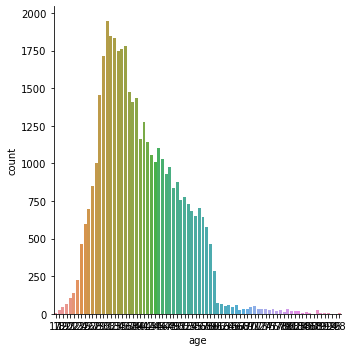

In [40]:
sns.catplot(data=f_data, x='age', kind='count')

In [41]:
print((f_data[f_data.age > 69].age.count() / f_data[f_data.age < 70].age.count())*100)

1.1517964586556644


Observations with age greater or equal to 70 years old represent only 1.15% of the records

## <font color=#ff686b>Data Cleaning</font>

<font color=#84dcc6>&#x2730;</font> <font color= #70d6ff>Formating </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color= #70d6ff>Outliers </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color=ff9770>Missing Data</font><br>
<font color=#84dcc6>&#x2730;</font> Extra Data<br>
<font color=#84dcc6>&#x2730;</font> Repeated data/indices<br>
<font color=#84dcc6>&#x2730;</font> Re-indexing<br>
<font color=#84dcc6>&#x2730;</font> Data Pre-processing<br>

In [42]:
''' 
Lets look for unkown values in our client_data columns
'''

missing_sum = 0

for column in raw_data.loc[:,client_data]:
  missing_in_column = raw_data[raw_data[column] == 'unknown'][column].count()
  missing_sum += missing_in_column
  print('{} -> {} missing values'.format(column, missing_in_column))

print('\nOf {} rows in the dataset has a total of {} occurrencies of missing values'\
  .format(len(raw_data), missing_sum, round(missing_sum/len(raw_data)*100)))

age -> 0 missing values
job -> 0 missing values
marital -> 0 missing values
education -> 0 missing values
default -> 8597 missing values
housing -> 990 missing values
loan -> 990 missing values

Of 41188 rows in the dataset has a total of 10577 occurrencies of missing values


In [43]:
# For a visual representation of the missing values, lets convert them to Nans

raw_data_na = raw_data.replace('unknown', np.nan)

<AxesSubplot:>

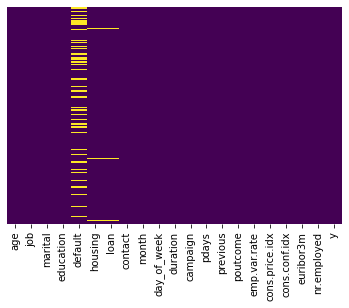

In [44]:
sns.heatmap(raw_data_na.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## <font color=#52b2cf>Insight</font>

the `Default` column has three types of values <font color=#9cadce>[yes, no, unknown]</font> but the hole dataset has only three occurrences of <font color=#9cadce>'yes'</font> this could mean there was an error at capturing the data or that in the first place people with default credit were no subject of these campaigns or that maybe these 3 observations occured before the current campaign, however, the precesence of <font color=#9cadce>8597 'unknown'</font> values could mean tha that information was not available at the time or not collected.

<font color=#61f4de>&#x27AD;</font> At this point it could be more meaningful use the <font color=#9cadce>unknown</font> values as a category value than the 3 obserbations with <font color=#9cadce>yes</font>

In [45]:
''' 
  Before grouping the missing values we still need to assign a zero to default, loan and housing to equalize the rest of the dataset
'''

f_data.default.replace({
  'yes': 1, 
  'no': 2, 
  'unknown': 0
}, inplace=True)

In [46]:
f_data.housing.replace({
  'yes': 1, 
  'no': 2, 
  'unknown': 0
}, inplace=True)

In [47]:
f_data.loan.replace({
  'yes': 1, 
  'no': 2, 
  'unknown': 0
}, inplace=True)

In [48]:
f_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,2,2,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
1,57,2,1,4,0,2,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
2,37,2,1,4,2,1,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
3,40,3,1,2,2,2,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
4,56,2,1,4,2,2,1,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,2,1,2,1,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,4,1,5,2,2,2,1,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,6,1,6,2,1,2,1,11,5,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,5,1,5,2,2,2,1,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,True


In [49]:
f_data[['age', 'default', 'housing', 'loan']].groupby(['default', 'housing', 'loan']).count()

age
default housing loan       
0       0       0       227
        1       1       723
                2      3641
        2       1       549
                2      3457
1       1       2         1
        2       2         2
2       0       0       763
        1       1      2968
                2     14243
        2       1      2008
                2     12606

In [50]:
''' 
3,641 obserbations with 'no' for loan and housing seem that could mean no for default since the person doesn't have a loan or a mortgage
'''
# Lets swap them to 'no', but first lets keep track of the indices

default_0_loan_2_housing_2 = f_data.loc[(f_data['default']==0) & ((f_data['housing']==2) & (f_data['loan']==2))].index
len(default_0_loan_2_housing_2)

3457

In [51]:
# now we can replace the 'no' for loan and housing seem that could mean no for default since the person doesn't have a loan or a mortgage

f_data['default'].mask((f_data['default']==0) & ((f_data['housing']==2) & (f_data['loan']==2)), 2, inplace=True)

In [52]:
''' 
Lets groupby 
'''

f_data[['age', 'default', 'housing', 'loan']].groupby(['default', 'housing', 'loan']).count()

age
default housing loan       
0       0       0       227
        1       1       723
                2      3641
        2       1       549
1       1       2         1
        2       2         2
2       0       0       763
        1       1      2968
                2     14243
        2       1      2008
                2     16063

In [53]:
default_yes = f_data[f_data.default == 1].index

In [54]:
np.searchsorted(default_0_loan_2_housing_2, default_yes)

array([2629, 2629, 2833])

In [55]:
f_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,2,2,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
1,57,2,1,4,2,2,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
2,37,2,1,4,2,1,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
3,40,3,1,2,2,2,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
4,56,2,1,4,2,2,1,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False


In [56]:
f_data.loc[f_data.y==True, :]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,4,3,1,0,1,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,True
83,49,10,1,6,0,1,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,True
88,49,5,1,3,2,2,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,True
129,41,5,1,5,0,1,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,True
139,45,4,1,3,0,1,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,6,1,6,2,1,2,1,11,4,...,1,1,6,3,-1.1,94.767,-50.8,1.031,4963.6,True
41178,62,6,1,6,2,2,2,1,11,4,...,2,6,3,3,-1.1,94.767,-50.8,1.031,4963.6,True
41181,37,3,1,6,2,1,2,1,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,True
41183,73,6,1,5,2,1,2,1,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,True


In [57]:
#f_data.corr()

In [58]:
f_data.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [59]:
f_data.pdays.value_counts().sort_values()

20         1
26         1
25         1
27         1
21         2
19         3
22         3
18         7
17         8
16        11
0         15
8         18
14        20
15        24
1         26
11        28
13        36
5         46
10        52
12        58
7         60
2         61
9         64
4        118
6        412
3        439
999    39673
Name: pdays, dtype: int64

In [60]:
f_data.loc[(f_data['pdays'] >= 999) & (f_data['previous'] != 0), :]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,4,2,0,2,1,2,2,10,2,...,1,999,1,2,-0.1,93.798,-40.4,4.968,5195.8,False
24019,40,2,1,4,2,1,2,2,10,2,...,1,999,1,2,-0.1,93.798,-40.4,4.968,5195.8,True
24076,36,3,1,6,2,1,2,2,11,3,...,1,999,1,2,-0.1,93.200,-42.0,4.663,5195.8,False
24102,36,3,1,4,2,1,2,2,11,3,...,1,999,1,2,-0.1,93.200,-42.0,4.286,5195.8,True
24113,29,9,1,6,2,1,2,2,11,4,...,1,999,1,2,-0.1,93.200,-42.0,4.245,5195.8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,32,3,1,6,2,2,2,2,11,3,...,1,999,1,2,-1.1,94.767,-50.8,1.030,4963.6,True
41170,40,7,3,6,2,1,2,1,11,3,...,2,999,4,2,-1.1,94.767,-50.8,1.030,4963.6,False
41173,62,6,1,6,2,1,2,1,11,4,...,1,999,2,2,-1.1,94.767,-50.8,1.031,4963.6,True
41175,34,11,2,0,2,1,2,1,11,4,...,1,999,2,2,-1.1,94.767,-50.8,1.031,4963.6,False


In [61]:
f_data.pdays.mask((f_data['pdays'] >= 999) & (f_data['previous'] != 0), 14, inplace=True)

In [62]:
f_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,2,2,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
1,57,2,1,4,2,2,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
2,37,2,1,4,2,1,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
3,40,3,1,2,2,2,2,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
4,56,2,1,4,2,2,1,2,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,2,1,2,1,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,4,1,5,2,2,2,1,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,6,1,6,2,1,2,1,11,5,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,5,1,5,2,2,2,1,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,True


In [63]:
f_data.loc[(f_data['pdays'] >= 999) & (f_data['previous'] != 0), :]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [64]:
f_data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.024042,-0.116172,-0.183084,-0.120971,0.001923,0.006397,0.007021,0.077265,-0.018486,...,0.004594,-0.016534,0.024365,0.026371,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.024042,1.000000,-0.005041,0.090069,0.027601,-0.006794,0.005560,-0.026371,0.062013,0.004164,...,-0.017591,-0.042178,0.050780,0.047763,-0.087012,-0.054880,0.013656,-0.076483,-0.085450,0.054175
marital,-0.116172,-0.005041,1.000000,0.108493,0.071042,-0.009768,-0.002344,-0.043264,-0.002129,-0.004307,...,-0.000228,-0.029088,0.028146,0.027972,-0.047154,-0.023167,-0.050650,-0.053062,-0.048958,0.025185
education,-0.183084,0.090069,0.108493,1.000000,0.160540,-0.015865,-0.004787,-0.113187,0.121453,-0.002618,...,-0.001764,-0.020681,0.020722,0.026058,-0.041756,-0.099414,0.043723,-0.032633,-0.024161,0.036556
default,-0.120971,0.027601,0.071042,0.160540,1.000000,0.254915,0.112593,-0.076140,0.052730,0.008094,...,-0.019379,-0.074673,0.074040,0.077542,-0.138981,-0.104004,-0.014208,-0.133438,-0.133071,0.074168
housing,0.001923,-0.006794,-0.009768,-0.015865,0.254915,1.000000,0.289759,0.065393,-0.023968,0.007088,...,0.010190,0.023647,-0.021002,-0.021433,0.053458,0.066337,0.027737,0.052739,0.042281,-0.009552
loan,0.006397,0.005560,-0.002344,-0.004787,0.112593,0.289759,1.000000,-0.004391,0.009307,-0.003206,...,-0.003899,0.000980,-0.000846,0.000581,-0.003055,-0.006315,0.005895,-0.001547,-0.002464,0.005038
contact,0.007021,-0.026371,-0.043264,-0.113187,-0.076140,0.065393,-0.004391,1.000000,-0.324315,0.019583,...,0.077368,0.242507,-0.212848,-0.226813,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,0.077265,0.062013,-0.002129,0.121453,0.052730,-0.023968,0.009307,-0.324315,1.000000,-0.006959,...,-0.030635,-0.043919,0.063754,0.060841,0.058874,-0.150350,0.264227,0.163411,0.132697,0.037187
day_of_week,-0.018486,0.004164,-0.004307,-0.002618,0.008094,0.007088,-0.003206,0.019583,-0.006959,1.000000,...,0.015098,-0.007362,0.004013,0.003279,-0.004401,-0.004586,-0.000099,-0.005552,-0.000734,0.010051
